In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
data = pd.read_csv('/content/drive/MyDrive/ML AND DL/Datasets/Mall_Customers.csv')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [4]:
data_processed = data.drop(['CustomerID'],axis=1)
data_processed['Gender'] = data_processed['Gender'].map({'Male':0,'Female':1})

In [5]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_processed)

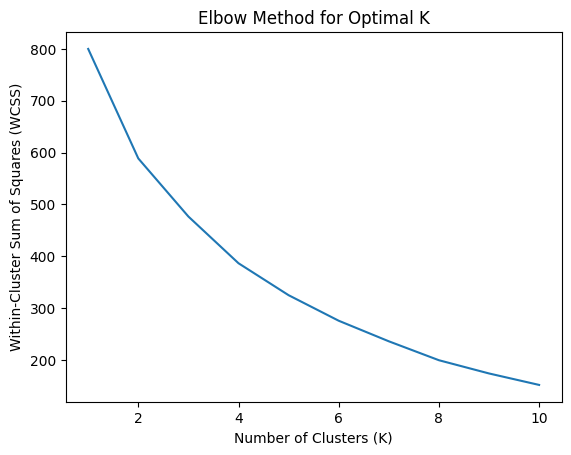

In [6]:
# Use the Elbow method to find the optimal number of clusters (K)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

In [19]:
# Choose the optimal K from the Elbow method (e.g., K=5)
optimal_k = 2

# Apply K-means clustering
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_scaled)

<ipython-input-21-ccc33a7bbe9e>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_analysis = data.groupby('Cluster').mean()


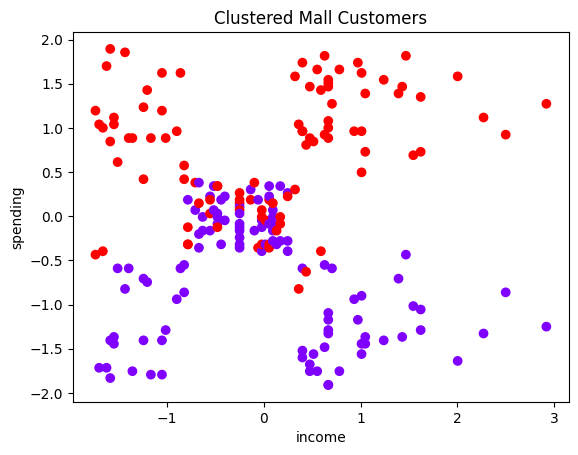

In [21]:
# Analyze the distribution of customers in each cluster
cluster_analysis = data.groupby('Cluster').mean()

# Visualize the clusters (consider plotting based on two relevant features)
plt.scatter(data_scaled[:, 2], data_scaled[:, 3], c=data['Cluster'], cmap='rainbow')
plt.title('Clustered Mall Customers')
plt.xlabel('income')
plt.ylabel('spending')
plt.show()